In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Import the data set
df = pd.read_csv('Necessary Insurance DB.csv')

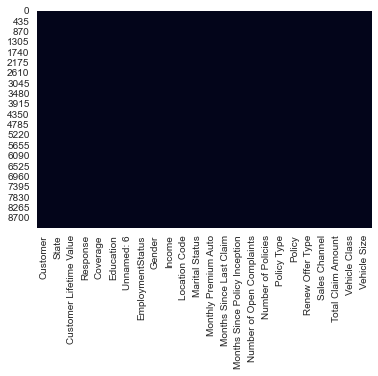

In [3]:
sns.heatmap(df.isnull() | df.isna(), cbar=False)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Unnamed: 6,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,"$2,764",No,Basic,Bachelor,2/24/11,Employed,F,"$56,274",Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,$385,Two-Door Car,Medsize
1,QZ44356,Arizona,"$6,980",No,Extended,Bachelor,1/31/11,Unemployed,F,$0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,"$1,131",Four-Door Car,Medsize
2,AI49188,Nevada,"$12,887",No,Premium,Bachelor,2/19/11,Employed,F,"$48,767",Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,$566,Two-Door Car,Medsize
3,WW63253,California,"$7,646",No,Basic,Bachelor,1/20/11,Unemployed,M,$0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,$530,SUV,Medsize
4,HB64268,Washington,"$2,814",No,Basic,Bachelor,11-3-02,Employed,M,"$43,836",Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,$138,Four-Door Car,Medsize


In [6]:
df.drop(['Unnamed: 6', 'Response', 'Customer'], axis=1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State                          9134 non-null   object
 1   Customer Lifetime Value        9134 non-null   object
 2   Coverage                       9134 non-null   object
 3   Education                      9134 non-null   object
 4   EmploymentStatus               9134 non-null   object
 5   Gender                         9134 non-null   object
 6   Income                         9134 non-null   object
 7   Location Code                  9134 non-null   object
 8   Marital Status                 9134 non-null   object
 9   Monthly Premium Auto           9134 non-null   int64 
 10  Months Since Last Claim        9134 non-null   int64 
 11  Months Since Policy Inception  9134 non-null   int64 
 12  Number of Open Complaints      9134 non-null   int64 
 13  Num

In [8]:
for c in ['Customer Lifetime Value', 'Income', 'Total Claim Amount']:
    df[c] = df[c].replace('[\$,]', '', regex=True).astype(float)


In [9]:
df.columns

Index(['State', 'Customer Lifetime Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
df.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2764.0,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,385.0,Two-Door Car,Medsize
1,Arizona,6980.0,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.0,Four-Door Car,Medsize
2,Nevada,12887.0,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.0,Two-Door Car,Medsize
3,California,7646.0,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,530.0,SUV,Medsize
4,Washington,2814.0,Basic,Bachelor,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.0,Four-Door Car,Medsize


In [11]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.945697,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.087475
std,6870.968043,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.493757
min,1898.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3994.250000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.000000
50%,5780.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000
75%,8962.250000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.750000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


In [12]:
for i in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']:
    print(i)
    print(df[i].median())

Customer Lifetime Value
5780.0
Income
33889.5
Monthly Premium Auto
83.0
Months Since Last Claim
14.0
Months Since Policy Inception
48.0
Number of Open Complaints
0.0
Number of Policies
2.0
Total Claim Amount
384.0


In [13]:
for i in ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
          'Marital Status', 'Location Code', 'Policy Type', 'Policy',
         'Vehicle Class', 'Vehicle Size', 'Renew Offer Type', 'Sales Channel']:
    print(i)
    print(df[i].unique())
    print()

State
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Coverage
['Basic' 'Extended' 'Premium']

Education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

EmploymentStatus
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']

Gender
['F' 'M']

Marital Status
['Married' 'Single' 'Divorced']

Location Code
['Suburban' 'Rural' 'Urban']

Policy Type
['Corporate Auto' 'Personal Auto' 'Special Auto']

Policy
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']

Vehicle Class
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']

Vehicle Size
['Medsize' 'Small' 'Large']

Renew Offer Type
['Offer1' 'Offer3' 'Offer2' 'Offer4']

Sales Channel
['Agent' 'Call Center' 'Web' 'Branch']



In [14]:
# sns.pairplot(df[['Customer Lifetime Value', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location Code',
#        'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
#        'Months Since Policy Inception', 'Number of Open Complaints', 'Policy', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']], hue='Policy')

In [15]:
#sns.countplot(df['Customer Lifetime Value'], hue=df['Coverage'])

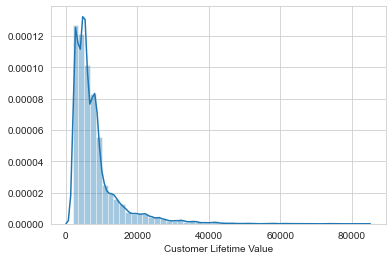

In [16]:
sns.distplot(df['Customer Lifetime Value'])

## Pre-processing

In [17]:
# remove outliers
dfc = df[np.abs(df['Customer Lifetime Value'] - df['Customer Lifetime Value'].mean()) <= (3*df['Customer Lifetime Value'].std())].copy()

In [18]:
#for c in ['Monthly Premium Auto', 'Renew Offer Type', 'Sales Channel', 'Policy', 'Vehicle Class', 'Number of Open Complaints']:
for c in ['Policy', 'Vehicle Class', 'Renew Offer Type', 'Sales Channel']:
    dfc.drop(c, axis=1, inplace=True)

In [19]:
dfc.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Total Claim Amount,Vehicle Size
0,Washington,2764.0,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,385.0,Medsize
1,Arizona,6980.0,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,1131.0,Medsize
2,Nevada,12887.0,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,566.0,Medsize
3,California,7646.0,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,530.0,Medsize
4,Washington,2814.0,Basic,Bachelor,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,138.0,Medsize


In [20]:
# take care of the categorical features
cat_cols = ['Gender', 'State', 'Location Code', 'Policy Type', 'EmploymentStatus', 'Marital Status'];
for i in  cat_cols:
    dfc[i] = dfc[i].astype('category')

In [21]:
# cat_feature_mask = []
# for col in dfc.columns:
#     cat_feature_mask.append(col in cat_cols)

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(categories = cat_cols, sparse=False ) 
# add ohe.fit_trasnform

In [22]:
# encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ord_cols = ['Coverage', 'Education', 'Vehicle Size']
dfc[ord_cols] = dfc[ord_cols].apply(lambda col: le.fit_transform(col))

# dfc['Coverage'] = dfc['Coverage'].replace({0:'Basic', 1:'Extended', 2:'Premium'});
# dfc['Education'] = dfc['Education'].replace({2:'Bachelor', 1:'College', 3:'Master', 0:'High School or Below', 4:'Doctor'})

In [23]:
dfc.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Total Claim Amount,Vehicle Size
0,Washington,2764.0,0,0,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,385.0,1
1,Arizona,6980.0,1,0,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,1131.0,1
2,Nevada,12887.0,2,0,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,566.0,1
3,California,7646.0,0,0,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,530.0,1
4,Washington,2814.0,0,0,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,138.0,1


In [24]:
# set dummy values
for i in cat_cols:
    df_dum = pd.get_dummies(dfc[i], drop_first=True)
    
    cols = []
    for c in df_dum:
        cols.append("%s%s" % (i, str(df_dum[c].name)))
    df_dum.columns = cols;
    dfc = pd.concat([dfc, df_dum],axis=1)
    dfc = dfc.drop(i, axis=1)

In [25]:
dfc.head()

,Customer Lifetime Value,Coverage,Education,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size,GenderM,StateCalifornia,StateNevada,StateOregon,StateWashington,Location CodeSuburban,Location CodeUrban,Policy TypePersonal Auto,Policy TypeSpecial Auto,EmploymentStatusEmployed,EmploymentStatusMedical Leave,EmploymentStatusRetired,EmploymentStatusUnemployed,Marital StatusMarried,Marital StatusSingle
0,2764.0,0,0,56274.0,69,32,5,0,1,385.0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1,6980.0,1,0,0.0,94,13,42,0,8,1131.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
2,12887.0,2,0,48767.0,108,18,38,0,2,566.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
3,7646.0,0,0,0.0,106,18,65,0,7,530.0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0
4,2814.0,0,0,43836.0,73,12,44,0,1,138.0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1


In [26]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8923 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        8923 non-null   float64
 1   Coverage                       8923 non-null   int32  
 2   Education                      8923 non-null   int32  
 3   Income                         8923 non-null   float64
 4   Monthly Premium Auto           8923 non-null   int64  
 5   Months Since Last Claim        8923 non-null   int64  
 6   Months Since Policy Inception  8923 non-null   int64  
 7   Number of Open Complaints      8923 non-null   int64  
 8   Number of Policies             8923 non-null   int64  
 9   Total Claim Amount             8923 non-null   float64
 10  Vehicle Size                   8923 non-null   int32  
 11  GenderM                        8923 non-null   uint8  
 12  StateCalifornia                8923 non-null   u

In [27]:
dfc.describe()

,Customer Lifetime Value,Coverage,Education,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size,GenderM,StateCalifornia,StateNevada,StateOregon,StateWashington,Location CodeSuburban,Location CodeUrban,Policy TypePersonal Auto,Policy TypeSpecial Auto,EmploymentStatusEmployed,EmploymentStatusMedical Leave,EmploymentStatusRetired,EmploymentStatusUnemployed,Marital StatusMarried,Marital StatusSingle
count,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000
mean,7301.669730,0.473383,1.550039,37615.204752,92.195674,15.088199,47.964474,0.386417,2.989017,428.753110,1.087975,0.491203,0.344503,0.096156,0.284994,0.087415,0.632411,0.173260,0.742239,0.041466,0.621652,0.047518,0.031492,0.254735,0.580522,0.270649
std,4990.295858,0.651110,1.381435,30421.819193,33.353823,10.060808,27.878732,0.914382,2.413603,284.594657,0.538158,0.499951,0.475233,0.294822,0.451437,0.282457,0.482176,0.378493,0.437426,0.199376,0.485002,0.212755,0.174652,0.435737,0.493501,0.444320
min,1898.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3936.000000,0.000000,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5677.000000,0.000000,1.000000,33816.000000,82.000000,14.000000,48.000000,0.000000,2.000000,379.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8706.000000,1.000000,3.000000,62368.000000,108.000000,23.000000,71.000000,0.000000,4.000000,542.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,28511.000000,2.000000,4.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# import h2o
# from h2o.automl import H2OAutoML
# h2o.init()

# h2o_df = h2o.import_file('Necessary Insurance DB.csv')
# splits = h2o_df.split_frame(ratios=[0.8],seed=1)
# train = splits[0]
# test = splits[1]
# y = "Customer Lifetime Value" 
# x = h2o_df.columns 
# x.remove(y) 

# aml = H2OAutoML(max_runtime_secs=1200, seed=1)
# aml.train(x=x,y=y, training_frame=train)

# lb = aml.leaderboard
# lb.head()


# Analysis

## 1)	Which characteristics are most useful in determining the value of the customers?

We are looking for customers that bring the most profit. Such customers include people who paid the most premiums with the fewest claims. Intuition suggest that customer gender, marital status, education, income level, employment status and location would contribute to how much profit they bring over the lifetime.

In [29]:
import sklearn
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm

In [30]:
from sklearn import metrics

def get_metrics(reg, y_test, y_pred):
    res = []
    
    res.append(str(reg.__class__.__name__))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    res.append(mae)
    mse = metrics.mean_squared_error(y_test, y_pred)
    res.append(mse)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    res.append(rmse)
    r2 = metrics.r2_score(y_test, y_pred)
    res.append(r2)
    
    return res
               
def show_metrics(res):
    print(res[0])
    print(' MAE : ', res[1])
    print(' MSE : ', res[2])
    print(' RMSE: ', res[3])
    print(' R^2 : ', res[4])

In [31]:
y = dfc['Customer Lifetime Value']
X = dfc.drop('Customer Lifetime Value', axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 1/3, random_state = 0)

In [33]:
# Start with plolynomial regression
pf = PolynomialFeatures(degree=2)
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.fit_transform(X_test)

In [34]:
lr = LinearRegression()
lr.fit(X_poly_train, y_train)
y_pred = lr.predict(X_poly_test)

In [35]:
results = []
m = get_metrics(lr, y_test, y_pred)
m[0] = 'PolynomialRegression'
show_metrics(m)
results.append(m)

PolynomialRegression
 MAE :  3077.687899159664
 MSE :  19499072.821990546
 RMSE:  4415.775449679314
 R^2 :  0.23144485307065077


In [36]:
regressors = [
    Ridge(alpha=.5),
    Lasso(alpha=0.1),
    LinearRegression(), 
    DecisionTreeRegressor(), 
    RandomForestRegressor(),
    GradientBoostingRegressor(), 
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, 
                     max_depth = 5, alpha = 10, n_estimators = 10), 
    # svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    KNeighborsRegressor(n_neighbors=3)
]

### Commented out regressors are processing over 100 minutes

In [37]:
for r in regressors: 
    print('======================================================================================')
    print('Running %s' % (r))
    r.fit(X_train, y_train)
    m = get_metrics(r, y_test, r.predict(X_test))
    show_metrics(m)
    results.append(m)
    print('======================================================================================')
    print('')

Running Ridge(alpha=0.5)
Ridge
 MAE :  3200.2868494304653
 MSE :  21896503.079439886
 RMSE:  4679.369944708356
 R^2 :  0.13695023886064295

Running Lasso(alpha=0.1)
Lasso
 MAE :  3200.219024578038
 MSE :  21896085.91756941
 RMSE:  4679.325369919195
 R^2 :  0.1369666812784739

Running LinearRegression()
LinearRegression
 MAE :  3200.2709157208333
 MSE :  21896582.62543653
 RMSE:  4679.378444348836
 R^2 :  0.13694710355848283

Running DecisionTreeRegressor()
DecisionTreeRegressor
 MAE :  1071.9932773109244
 MSE :  10250007.189243697
 RMSE:  3201.563241487461
 R^2 :  0.5959963915580737

Running RandomForestRegressor()
RandomForestRegressor
 MAE :  918.6676571428573
 MSE :  5620848.188093109
 RMSE:  2370.832804753028
 R^2 :  0.7784545016829949

Running GradientBoostingRegressor()
GradientBoostingRegressor
 MAE :  1128.4562111210664
 MSE :  6169390.073022035
 RMSE:  2483.82569296278
 R^2 :  0.7568337460287569

Running XGBRegressor(alpha=10, base_score=None, booster=None, colsample_bylevel=N

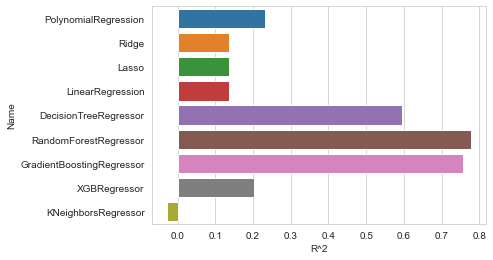

In [38]:
res = pd.DataFrame(np.array(results))
res.columns = ['Name', 'MAE', 'MSE', 'RMSE', 'R^2']
sns.barplot(data=res, y='Name', x='R^2')

In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [40]:
print(X.columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['Coverage', 'Education', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Vehicle Size', 'GenderM', 'StateCalifornia', 'StateNevada',
       'StateOregon', 'StateWashington', 'Location CodeSuburban',
       'Location CodeUrban', 'Policy TypePersonal Auto',
       'Policy TypeSpecial Auto', 'EmploymentStatusEmployed',
       'EmploymentStatusMedical Leave', 'EmploymentStatusRetired',
       'EmploymentStatusUnemployed', 'Marital StatusMarried',
       'Marital StatusSingle'],
      dtype='object')
[False  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False  True
 False]
[ 8  1  1  1  1  1  1  1  1  1  2  9  5  4 14 16  7 11  3 12 13 10 15  1
  6]


In [41]:
for i in range(len(X.columns)):
    if (rfe.support_[i]):
        print(X.columns[i])

Education
Income
Monthly Premium Auto
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Total Claim Amount
Vehicle Size
Marital StatusMarried


## 2)	Which clients provide the highest lifetime value

In [42]:
df.sort_values(by=['Customer Lifetime Value'], ascending=False).head(10)

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5716,Oregon,83325.0,Extended,High School or Below,Employed,M,58958.0,Suburban,Married,231,31,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1109.0,Luxury Car,Small
1974,Washington,74229.0,Extended,High School or Below,Unemployed,M,0.0,Suburban,Single,242,1,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.0,Luxury Car,Medsize
6252,California,73226.0,Extended,Bachelor,Employed,F,39547.0,Suburban,Married,202,11,21,0,2,Personal Auto,Personal L3,Offer1,Branch,970.0,Luxury SUV,Medsize
7283,Oregon,67907.0,Premium,Bachelor,Employed,M,78310.0,Rural,Married,192,34,18,1,2,Personal Auto,Personal L1,Offer1,Agent,152.0,Sports Car,Medsize
5279,Washington,66026.0,Basic,Bachelor,Employed,M,33481.0,Suburban,Single,188,28,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1195.0,Luxury SUV,Medsize
7303,California,64619.0,Extended,High School or Below,Unemployed,M,0.0,Suburban,Married,217,14,40,1,2,Personal Auto,Personal L3,Offer1,Branch,1562.0,Luxury Car,Small
3760,Oregon,61850.0,Extended,College,Unemployed,F,0.0,Suburban,Married,238,19,29,0,2,Personal Auto,Personal L1,Offer3,Branch,1142.0,Luxury SUV,Medsize
8825,California,61135.0,Basic,College,Unemployed,M,0.0,Suburban,Single,198,2,75,0,2,Corporate Auto,Corporate L3,Offer2,Branch,2275.0,Luxury Car,Medsize
4126,Arizona,60556.0,Extended,College,Unemployed,F,0.0,Suburban,Married,204,35,45,0,2,Personal Auto,Personal L3,Offer1,Web,979.0,Luxury SUV,Large
2908,Arizona,58754.0,Premium,Bachelor,Employed,F,24964.0,Suburban,Married,185,0,84,0,2,Personal Auto,Personal L2,Offer2,Agent,888.0,SUV,Medsize


## 3)	Which clients are most likely to make a claim?

In [52]:
df_hc = dfc[dfc['Number of Open Complaints'] >= 5]

Running KMeans with 1 clusters
Running KMeans with 2 clusters
Running KMeans with 3 clusters
Running KMeans with 4 clusters
Running KMeans with 5 clusters
Running KMeans with 6 clusters
Running KMeans with 7 clusters
Running KMeans with 8 clusters
Running KMeans with 9 clusters
Running KMeans with 10 clusters
Running KMeans with 11 clusters
Running KMeans with 12 clusters
Running KMeans with 13 clusters
Running KMeans with 14 clusters
Running KMeans with 15 clusters
Running KMeans with 16 clusters
Running KMeans with 17 clusters
Running KMeans with 18 clusters
Running KMeans with 19 clusters
Running KMeans with 20 clusters
Running KMeans with 21 clusters
Running KMeans with 22 clusters
Running KMeans with 23 clusters


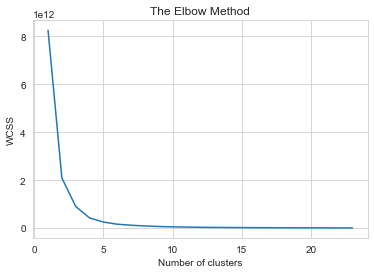

In [90]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 24):
    print("Running KMeans with %s clusters" % (i))
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 24), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # sum of squares of the distances of each data point in all clusters to their centroids
plt.show()

From the elbow method we can suggest that there are 4 distinct clusters

In [70]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=24)
pca.fit(Xs)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(Xs)

In [72]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index)
# X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1.057300,-0.352378,-0.131504,0.692662,1.051562,-1.401745,1.750121,2.712856,-0.256949,1.299945,-0.442349,0.973891,-1.787557,-0.786606,-1.371307,-0.448038,0.602876,0.764044,-1.285578,-0.512365,-0.253458,-0.256237,0.077654,-0.039681
1,3.745502,0.399198,0.534755,-0.898024,-0.659906,0.758683,-0.104868,0.158070,-0.854680,-0.197452,-0.225835,0.698073,-0.069184,1.895781,-0.994426,-0.333029,0.818648,0.306761,0.397821,-0.712965,-0.089518,1.057731,0.210990,1.095319
2,-0.423065,2.284471,0.029289,0.556255,-0.588770,-0.519017,2.112867,-2.189754,0.086102,0.418589,-0.441783,0.527198,-0.938675,0.096953,-1.216288,-0.634295,1.173619,-0.881931,0.443910,-1.042920,-0.239892,-0.302641,-0.131263,0.009329
3,1.869769,-0.351353,-1.884182,0.404579,1.342947,0.901037,-0.531727,0.243277,-1.062349,-0.281525,-0.953731,-0.389702,1.604195,0.443957,-1.498435,-0.590971,0.221421,0.377673,-1.214749,0.468999,-0.078823,-0.205821,0.221715,-0.329742
4,-0.655850,-1.544403,1.001986,-1.606567,-1.034787,-1.558407,1.293431,2.394574,0.870600,0.263305,0.865418,0.853419,0.289245,-0.683980,-0.722924,-1.164240,-0.060814,-0.452653,0.238820,1.033089,-0.376847,-0.227123,-0.672534,0.343223


In [73]:
pca.explained_variance_ratio_.round(2)

array([0.15, 0.07, 0.06, 0.06, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.02, 0.01, 0.01,
       0.01, 0.  ])

In [75]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.15, 0.22, 0.28, 0.34, 0.39, 0.44, 0.49, 0.53, 0.58, 0.62, 0.66,
       0.7 , 0.74, 0.78, 0.82, 0.86, 0.89, 0.92, 0.94, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [95]:
from functions import *

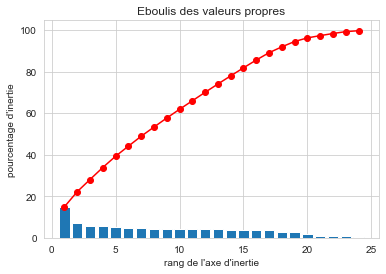

In [96]:
display_scree_plot(pca)

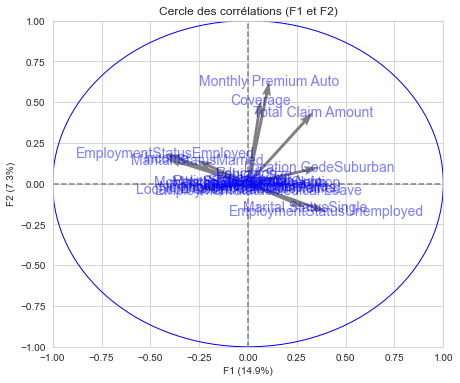

In [97]:
display_circles(pca.components_, 5, pca, [(0,1)], labels = np.array(X.columns),)

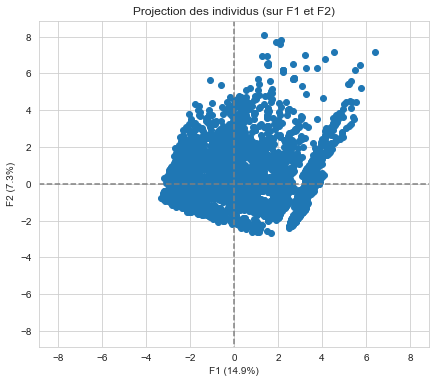

In [98]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(Xs) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, 24, pca, [(0,1)])
plt.show()

5)	Which clients are least valuable?

In [44]:
df.sort_values(by=['Customer Lifetime Value']).head(10)

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6037,California,1898.0,Basic,Bachelor,Unemployed,M,0.0,Suburban,Single,67,15,91,3,1,Personal Auto,Personal L2,Offer1,Agent,414.0,Two-Door Car,Medsize
2210,Arizona,1899.0,Basic,College,Unemployed,F,0.0,Suburban,Single,70,17,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.0,Two-Door Car,Small
2771,California,1904.0,Basic,Bachelor,Unemployed,F,0.0,Suburban,Single,63,22,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.0,Four-Door Car,Medsize
7083,California,1918.0,Basic,College,Unemployed,M,0.0,Suburban,Single,61,2,54,2,1,Personal Auto,Personal L1,Offer1,Branch,439.0,Two-Door Car,Small
6711,Oregon,1941.0,Basic,High School or Below,Unemployed,M,0.0,Suburban,Single,66,5,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.0,Two-Door Car,Large
5894,Arizona,1995.0,Basic,College,Unemployed,M,0.0,Suburban,Single,61,18,96,0,1,Personal Auto,Personal L1,Offer2,Web,393.0,Four-Door Car,Medsize
7135,Oregon,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Personal Auto,Personal L3,Offer1,Branch,317.0,Four-Door Car,Small
3665,Oregon,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Personal Auto,Personal L3,Offer1,Branch,317.0,Four-Door Car,Small
4818,California,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Corporate Auto,Corporate L3,Offer1,Branch,317.0,Four-Door Car,Small
1916,Oregon,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Special Auto,Special L2,Offer1,Branch,317.0,Four-Door Car,Small


Single unemployed customers